## Data Cleaning, Analysis, and Visualization

### This notebook explains the data cleaning process used in this project. Moreover, it also analyze the data and draws meaningful conclusions. 

##### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from random import randint
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

##### Data cleaning process

In [ ]:
# Ref: https://www.kaggle.com/paramaggarwal/fashion-product-images-small

def remove_items(styles, col, item):
    """
    function to drop certain columns

    input: styles: dataframe
          col: column to drop items from
          item: items to drop
    return: dataframe
    """

    for i in item:
        styles = styles.drop(styles[styles[col] == i].index)
    return styles

def clean_df():
    """
    function to fetch and clean the data

    input : path to .csv
    return: dataframe
    """

    styles = pd.read_csv("./Dataset/styles.csv", error_bad_lines=False)

    # drop unnecessary columns which are not needed to make recommendation
    styles = styles.drop(["productDisplayName", "year"], axis = 1) 
    styles = styles[(styles.masterCategory=='Apparel') | (styles.masterCategory=='Footwear')] 
    styles = styles.drop(styles[styles["subCategory"] == "Innerwear"].index)

    styles = styles.dropna() # drop NA
    styles = remove_items(styles, "subCategory", ["Apparel Set", "Dress", "Loungewear and Nightwear", "Saree", "Socks"])

    # group various footwear in one category
    styles["subCategory"] = styles["subCategory"].transform(lambda x: "Footwear" if(x in ["Shoes", "Flip Flops", "Sandal"]) else x) 
    # drop incomplete rows
    styles = styles.drop(labels=[6695, 16194, 32309, 36381, 40000], axis=0) 

    return styles

In [ ]:
styles = clean_df()
styles

/tmp/ipykernel_19259/968429672.py:23: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  styles = pd.read_csv("./Dataset/styles.csv", error_bad_lines=False)
b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: 

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Casual
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Casual
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Casual
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual
...,...,...,...,...,...,...,...,...
44417,12544,Women,Apparel,Topwear,Tshirts,Peach,Fall,Casual
44418,42234,Women,Apparel,Topwear,Tops,Blue,Summer,Casual
44419,17036,Men,Footwear,Footwear,Casual Shoes,White,Summer,Casual
44420,6461,Men,Footwear,Footwear,Flip Flops,Red,Summer,Casual


In [ ]:
len(styles.baseColour.unique()),styles.baseColour.unique()

(43,
 array(['Navy Blue', 'Blue', 'Black', 'Grey', 'Green', 'Purple', 'White',
        'Brown', 'Pink', 'Beige', 'Red', 'Khaki', 'Silver', 'Off White',
        'Yellow', 'Charcoal', 'Copper', 'Magenta', 'Orange', 'Lavender',
        'Sea Green', 'Cream', 'Peach', 'Gold', 'Tan', 'Olive', 'Burgundy',
        'Maroon', 'Grey Melange', 'Multi', 'Teal', 'Rust',
        'Turquoise Blue', 'Bronze', 'Mustard', 'Coffee Brown', 'Taupe',
        'Mauve', 'Mushroom Brown', 'Metallic', 'Nude', 'Lime Green',
        'Fluorescent Green'], dtype=object))

In the plots drawn below, we can easily see that we have a total of 43 colors in the dataset. Some of these colors are close and hard to distinguish. That is why we achieved a very low accuracy on a deep learning model to predict the color of the clothes. Because of that, we extracted the colors directly from the pictures instead of predicting it from a ML model.

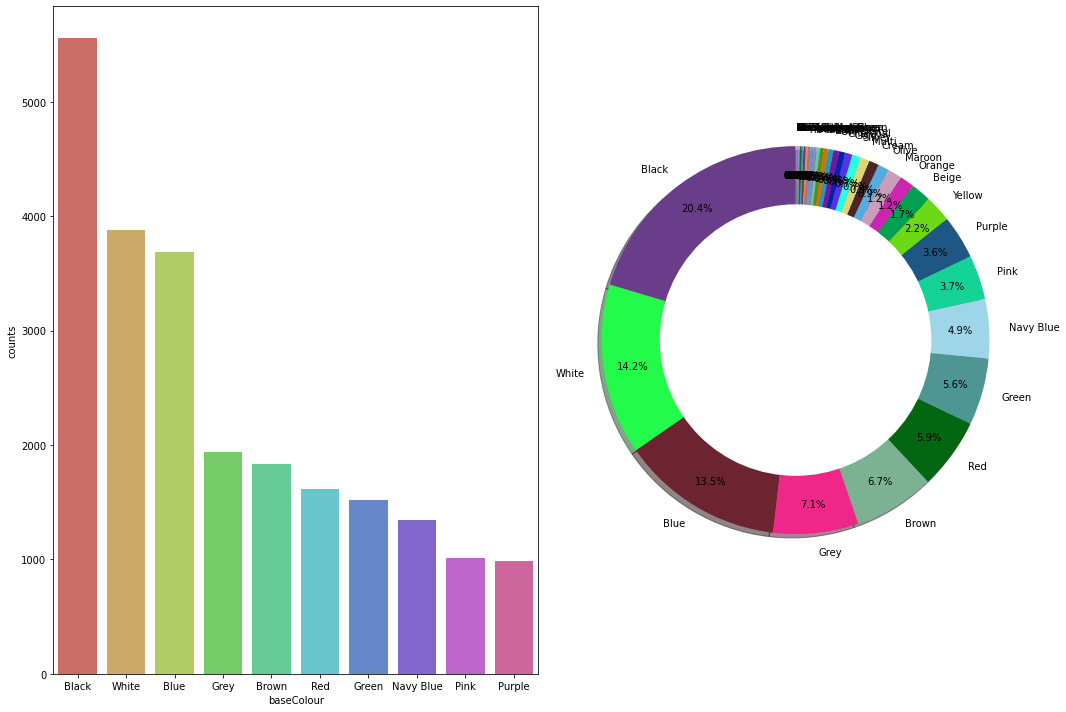

In [ ]:
# plots to show the different colors present in the dataset

df = styles.copy()

df_colors = df.groupby(["baseColour"]).size().reset_index(name="counts").sort_values(by=["counts"], ascending=False)

# generate random hex color code
colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for n in range(df.baseColour.nunique())] 

fig, axes = plt.subplots(1, 2, figsize=(15, 10))
sns.barplot(x="baseColour", y="counts", data=df_colors.head(10), palette="hls", ax=axes[0])
axes[1].pie(list(df_colors.counts.values), labels=list(df_colors.baseColour.values), autopct="%1.1f%%", shadow=True, startangle=90, pctdistance=0.85, colors=colors)
center_cir = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_cir)
plt.tight_layout()
plt.show()

<AxesSubplot:>

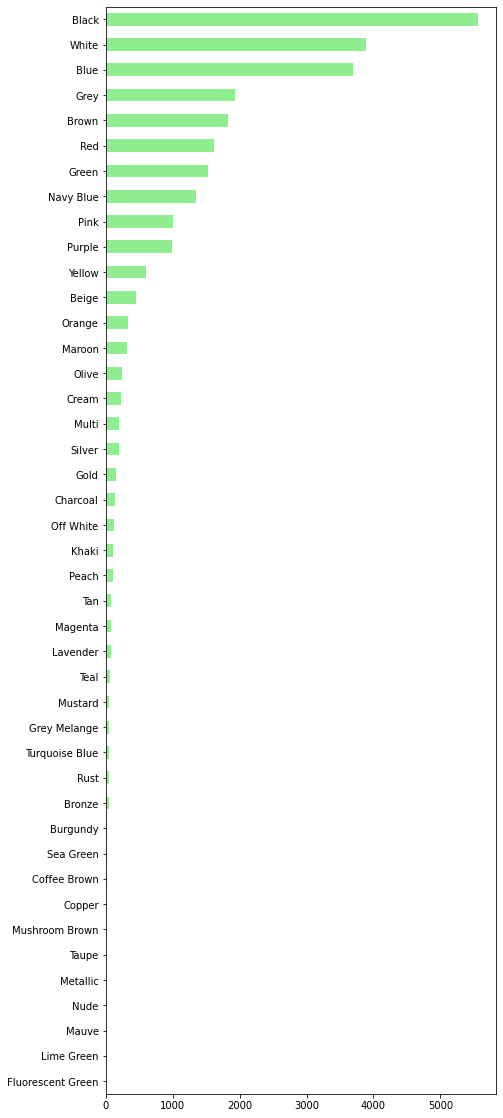

In [ ]:
plt.figure(figsize=(7,20))
styles.baseColour.value_counts().sort_values().plot(kind='barh', color='lightgreen')

While using the color model, we observed that the model often incorrectly recognized black color. We believe that this behavior is observed because of the presence of a large amount of black colored clothes, thus causing data imbalance.

In [ ]:
# change the original color column and grouping similar colors
styles.loc[(styles.baseColour=='Red')|
           (styles.baseColour=='Brown')|
           (styles.baseColour=='Coffee Brown')|
           (styles.baseColour=='Maroon')|
           (styles.baseColour=='Rust')|
           (styles.baseColour=='Burgundy')|
           (styles.baseColour=='Mushroom Brown'),"colorgroup"] = "Red"
styles.loc[(styles.baseColour=='Copper'),"colorgroup"] = "Dark Orange"
styles.loc[(styles.baseColour=='Orange')|
           (styles.baseColour=='Bronze')|
           (styles.baseColour=='Skin')|
           (styles.baseColour=='Nude'),"colorgroup"] = "Orange"
styles.loc[(styles.baseColour=='Gold')|
           (styles.baseColour=='Khaki')|
           (styles.baseColour=='Beige')|
           (styles.baseColour=='Mustard')|
           (styles.baseColour=='Tan')|
           (styles.baseColour=='Metallic'),"colorgroup"]= "Dark Yellow"
styles.loc[(styles.baseColour=='Yellow'),"colorgroup"] = "Yellow"
styles.loc[(styles.baseColour=='Lime Green'),"colorgroup"]= "Green"
styles.loc[(styles.baseColour=='Green')|
       (styles.baseColour=='Sea Green')|
       (styles.baseColour=='Fluorescent Green')|
       (styles.baseColour=='Olive'),"colorgroup"] = "Dark Green"
styles.loc[(styles.baseColour=='Teal')|
       (styles.baseColour=='Turquoise Blue'),"colorgroup"] = "Light Blue"
styles.loc[(styles.baseColour=='Blue'),"colorgroup"]= "Blue"
styles.loc[(styles.baseColour=='Navy Blue'),"colorgroup"] = "Dark Blue"
styles.loc[(styles.baseColour=='Purple')|
       (styles.baseColour=='Lavender'),"colorgroup"] = "Purple"
styles.loc[(styles.baseColour=='Pink')|
       (styles.baseColour=='Magenta')|
       (styles.baseColour=='Peach')|
       (styles.baseColour=='Rose')|
       (styles.baseColour=='Mauve'),"colorgroup"] = "Pink"
styles.loc[(styles.baseColour=='Black')|
       (styles.baseColour=='Charcoal'),"colorgroup"] = "Black"
styles.loc[(styles.baseColour=='White')|
       (styles.baseColour=='Off White')|
       (styles.baseColour=='Cream'),"colorgroup"] = "White"
styles.loc[(styles.baseColour=='Grey')|
       (styles.baseColour=='Silver')|
       (styles.baseColour=='Taupe')|
       (styles.baseColour=='Grey Melange'),"colorgroup"] = "Grey"
styles.loc[(styles.baseColour=='Multi'),"colorgroup"] = "Multi"

<AxesSubplot:>

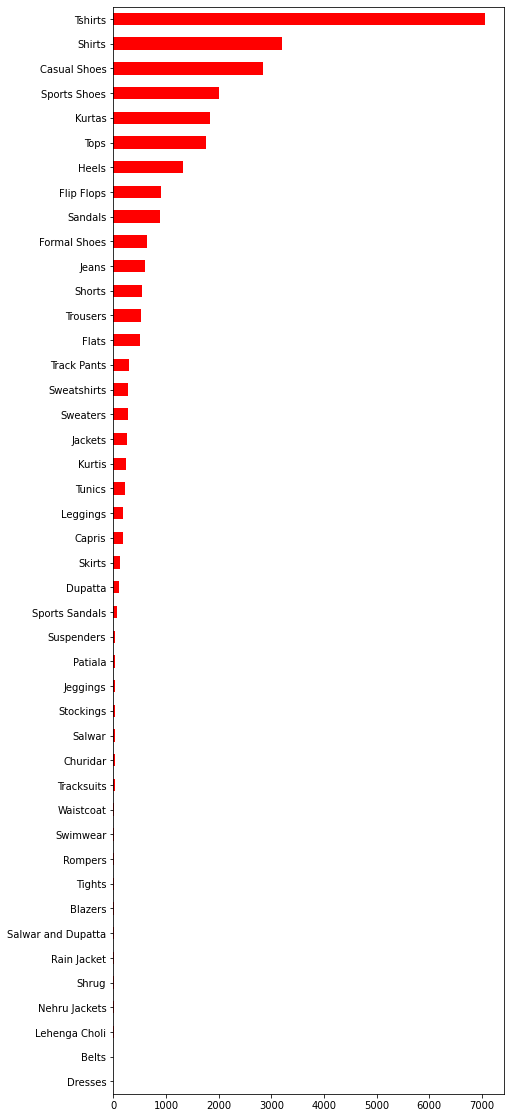

In [ ]:
# plot to show the variety of clothes present in dataset
plt.figure(figsize=(7,20))
styles.articleType.value_counts().sort_values().plot(kind='barh', color='red')

As we can easily observe that there are a lot of T-shirts in the dataset as compared to other clothes like Blazers, Tights, Rompers etc., which is consistent with the fact that our model often misidentifies to T-shirts.

<AxesSubplot:>

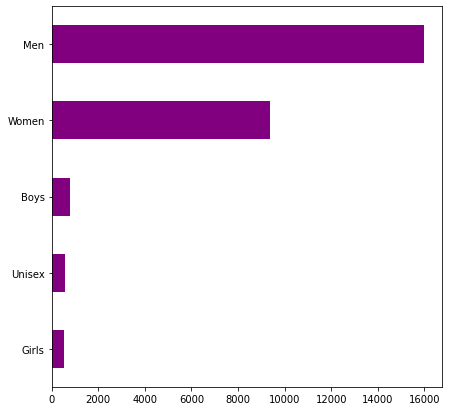

In [ ]:
# plot to show number of clothes for every gender class
plt.figure(figsize=(7,7))
styles.gender.value_counts().sort_values().plot(kind='barh', color='purple')

We found that sometimes our model would incorrectly identify women clothes as men clothes. Moreover, we have never seen boys and girls and unisex in the recognition results.